#### First, we import the packages that we'll need.
>We will use the pandas package for data manipulation and the seaborn & matplotlib for data visualizations.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

#### We read the data into a Pandas Data Frame.

>We use two different datasets, with the first containing data for the temperature levels per year,
and the second one contains data for the rainfall levels per year.

In [2]:
df_temp = pd.read_csv('tempYearly.csv')
df_rain = pd.read_csv('rainYearly.csv')

#### Then, we review our datasets by calling a sample of the first 5 rows.

In [3]:
df_temp.head(5)

,Year,Temperature
0,1956,16.99
1,1957,10.34
2,1958,21.01
3,1959,23.68
4,1960,24.59


In [4]:
df_rain.head(5)

,Year,Rainfall
0,1956,1.01
1,1957,1.66
2,1958,3.50
3,1959,3.31
4,1960,3.61


#### Now let's examine the profile of the datasets.

**The dataset that contains information for the temperature per year has:**      
> • 2 columns  
  • 62 non-null entries (observations)  
  • the variable "Year" as  datatype integer  
  • the variable "Temperature" as datatype float  

In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         62 non-null     int64  
 1   Temperature  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


**The dataset that contains information about the rainfalls per year has:**  
 >  • 2 columns  
    • 61 non-null entries (observations)  
    • the variable "Year" as datatype integer  
    • the variable "Rainfall" as datatype float  

In [6]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      61 non-null     int64  
 1   Rainfall  61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


#### **Cleaning our Datasets:**
>We create a scatter plot graph to review our data by visualizing them. This way, we can easily spot the outliers.

#### **Temperature:**  
>As we can see below, the majority of the data observations are moving per year between 0 and 50 degrees. However, we spot outliers in our
results, as some observations are significantly away from the rest indicating abnormal temperature rates. This issue could easily lead to misleading metrics and confusing visualizations.

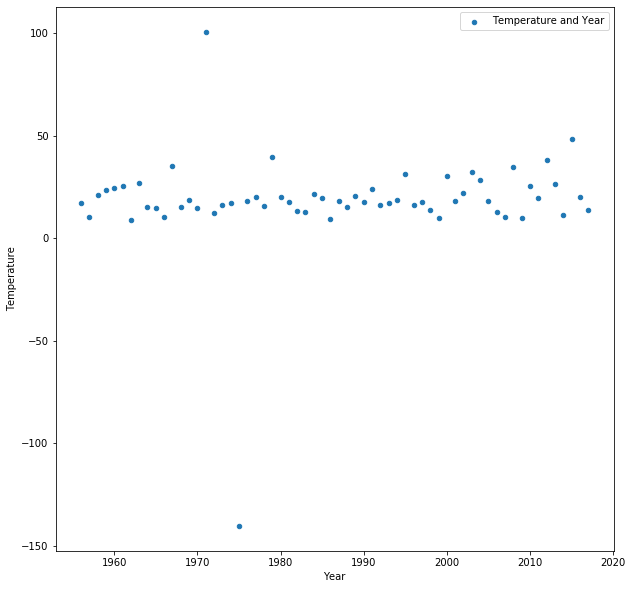

In [7]:
df_temp.plot.scatter(x='Year',y='Temperature',label = 'Temperature and Year',figsize=(10,10))
None

#### **We Filter our datasets to remove the outliers:**
>We use the .query() method to filter out the outliers by setting observation limits based on our scatter plot review. We limit our  
observations of temperatures between 0 and 40 degrees:

In [8]:
df_temp_f = df_temp.query('Temperature > 0 and Temperature < 40')
df_temp_f.head(5)

,Year,Temperature
0,1956,16.99
1,1957,10.34
2,1958,21.01
3,1959,23.68
4,1960,24.59


#### By removing the outliers, we can now see our observations in a more compact area and examine our data's behavior.

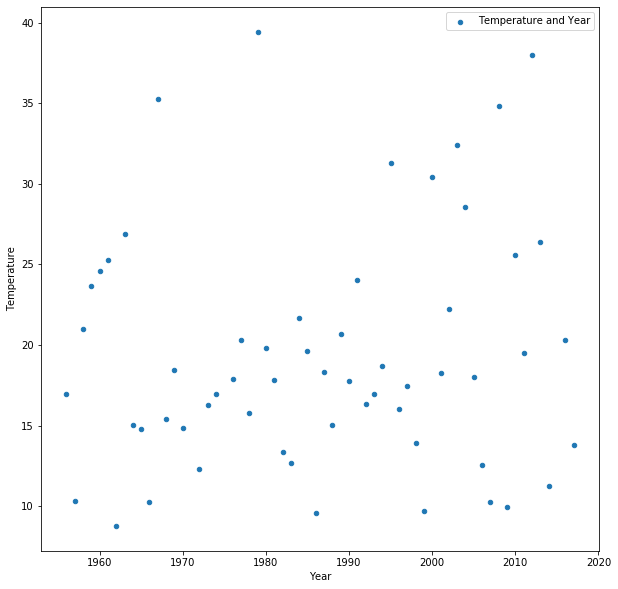

In [9]:
df_temp_f.plot.scatter(x='Year',y='Temperature',label = 'Temperature and Year',figsize=(10,10))
None

#### **Rainfall:**  
>Repeating the same procedure for the Rainfall dataset, we again spot outliers that could damage our analysis and we proceed to exclude them.

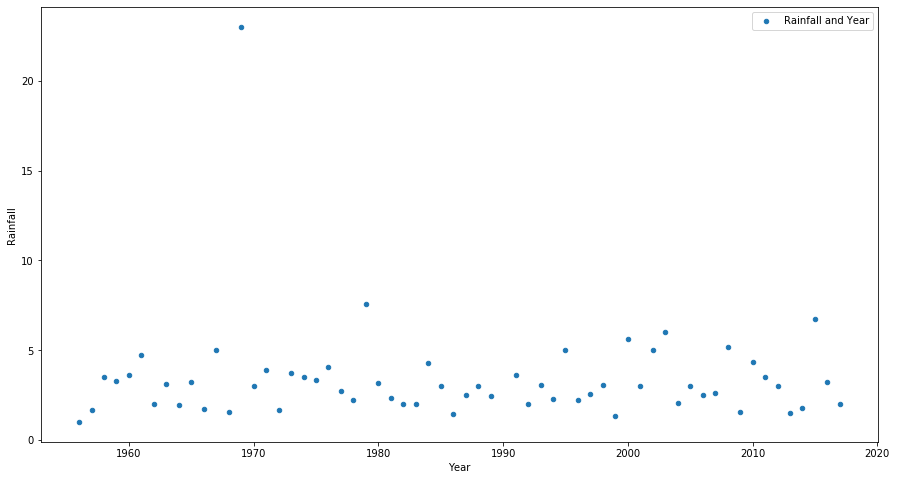

In [10]:
df_rain.plot.scatter(x='Year',y='Rainfall',label='Rainfall and Year',figsize=(15,8))
None

**We similarly limit our observations for the rainfall variable using the .query() method to filter out extreme values.**

In [11]:
df_rain_f= df_rain.query('Rainfall < 6 and Rainfall > 0')

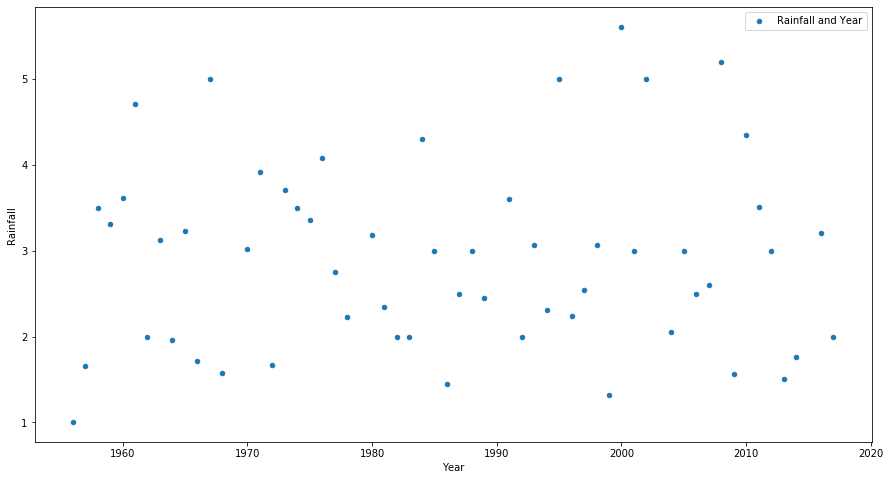

In [12]:
df_rain_f.plot.scatter(x='Year',y='Rainfall',label='Rainfall and Year',figsize=(15,8))
None

#### Now that I have processed my data I need to combine them in order to visualize them together and come to conclusions concerning their relationship.

>I use the Year as the primary key to combining my data with the merge method, which executes the same way as the join methods in SQL.
By using the inner join method to merge the two datasets, I create a combined data frame that only includes the observations, the 'key' of which exists in both of the datasets.

In [13]:
df_merge = pd.merge(df_temp_f,df_rain_f, on = "Year" , how = 'inner')
df_merge.head(5)

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61


As we can see below, we have no null-values

In [14]:
df_merge.isnull().sum()

Year           0
Temperature    0
Rainfall       0
dtype: int64

#### Let's now examine our merged data frame:  
 • What is the time period that our observations are taking place?  
 • Which is the highest / lowest temperature, the year was observed, and the corresponding Rainfall level?  
 • Which is the highest / lowest Rainfall level, the year was observed, and the corresponding Temperature level?  

In [15]:
print(df_merge['Year'].unique())
print('The starting year: ',df_merge['Year'].min())
print('The most recent year: ',df_merge['Year'].max())

[1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1970
 1972 1973 1974 1976 1977 1978 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2016 2017]
The starting year:  1956
The most recent year:  2017


In [16]:
df_merge[['Temperature','Rainfall']].describe().round(2)

,Temperature,Rainfall
count,55.00,55.00
mean,18.83,2.88
std,6.87,1.10
min,8.77,1.01
25%,14.36,2.00
50%,17.81,3.00
75%,21.96,3.50
max,38.01,5.60


#### Sorting values by Temperature

In [17]:
temp_max = df_merge.sort_values('Temperature',ascending=False).head(5).reset_index(drop=True)
temp_min = df_merge.sort_values('Temperature',ascending=True).head(5).reset_index(drop=True)
print('Top 5 Temperature Values:')
print(temp_max)
print('==========================================')
print('Bottom 5 Temperature Values:')
print(temp_min)

Top 5 Temperature Values:
   Year  Temperature  Rainfall
0  2012        38.01       3.0
1  1967        35.26       5.0
2  2008        34.81       5.2
3  1995        31.27       5.0
4  2000        30.40       5.6
Bottom 5 Temperature Values:
   Year  Temperature  Rainfall
0  1962         8.77      2.00
1  1986         9.55      1.45
2  1999         9.68      1.32
3  2009         9.94      1.56
4  1966        10.27      1.71


#### Sorting Values by Rainfall

In [18]:
rain_max = df_merge.sort_values('Rainfall',ascending=False).head(5).reset_index(drop=True)
rain_min = df_merge.sort_values('Rainfall',ascending=True).head(5).reset_index(drop=True)
print('Top 5 Rainfall Values:')
print(rain_max)
print('==========================================')
print('Bottom 5 Rainfall Values:')
print(rain_min)

Top 5 Rainfall Values:
   Year  Temperature  Rainfall
0  2000        30.40       5.6
1  2008        34.81       5.2
2  1967        35.26       5.0
3  1995        31.27       5.0
4  2002        22.23       5.0
Bottom 5 Rainfall Values:
   Year  Temperature  Rainfall
0  1956        16.99      1.01
1  1999         9.68      1.32
2  1986         9.55      1.45
3  2013        26.41      1.50
4  2009         9.94      1.56


#### Now we will use the seaborn package to create a visualization for our merged data frame.

We want to create a jointplot to show a regression of our data and detect their relationship.  
>• First we define as X the column 'Rainfall', and as Y the column 'Temperature'.  
• Secondly, we define the data source of our graph by setting data = df_merge (the variable that contains our merged dataset).  
• Finally, we set the type of our plot which will be a regression plot, thus kind = 'reg'

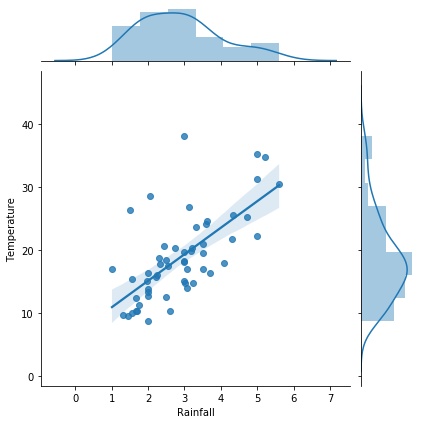

In [19]:
sns.jointplot('Rainfall','Temperature', data=df_merge, kind='reg')
None

**Creating a jointplot with the help of the seaborn package, we have combined a scatter plot and a regression line, allowing us to  
visualize the relationship between two variables and assess their linear correlation.**

**Scatter plot:**  
>The scatter plot shows the distribution of data points for 'Rainfall' and 'Temperature'. Each point represents a data observation, with 'Rainfall' on the x-axis and 'Temperature' on the y-axis. By observing the scatter plot, we can identify patterns, clusters, or any visible relationship between the two variables.

**Regression line:**  
>The regression line represents the best-fit line that minimizes the distance between the line and the data points. It provides an estimate of the linear relationship between 'Rainfall' and 'Temperature'. The slope of the line indicates the direction and strength of the relationship, while the intercept represents the expected 'Temperature' value when 'Rainfall' is zero. As the regression line has a positive slope, it suggests a positive correlation between the two variables, meaning that while the temperature rises, we also expect the Rainfall's variable values to rise.

**Histograms:**  
>The histograms are a frequency distribution. As appears for the two variables gives us an idea of how often the 'X'(Rainfall) and 'Y'(Temperature) values occur.